In [8]:
using Requests
import Requests: get, post, put, delete, options
ip = ip"130.211.134.112"

ip"130.211.134.112"

In [9]:
resp = get("http://$(ip):8000/api/server/info")
JSON.parse(bytestring(resp.data), dicttype=Dict{Symbol, Any})

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in bytestring(::Array{UInt8,1}) at ./deprecated.jl:50
 in include_string(::String, ::String) at ./loading.jl:441
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at /usr/people/jingpeng/.julia/v0.5/IJulia/src/execute_request.jl:169
 in eventloop(::ZMQ.Socket) at /usr/people/jingpeng/.julia/v0.5/IJulia/src/eventloop.jl:8
 in (::IJulia.##9#15)() at ./task.jl:360
while loading In[9], in expression starting on line 2


Dict{Symbol,Any} with 7 entries:
  Symbol("DVID Version")      => "v0.8.1"
  Symbol("Server time")       => "2016-10-28 18:30:53.890690351 +0000 UTC"
  Symbol("Datastore Version") => "0.10.0"
  :Cores                      => "6"
  Symbol("Maximum Cores")     => "6"
  Symbol("Server uptime")     => "185h21m29.437303746s"
  Symbol("Storage backend")   => "basholeveldb; gbucket"

In [10]:
resp = get("http://$(ip):8000/api/server/types")
@show resp.status
# @show deserialize(IOBuffer(resp.data))
JSON.parse(bytestring(resp.data), dicttype=Dict{Symbol, Any})

resp.status = 200


Dict{Symbol,Any} with 4 entries:
  :labelblk  => "github.com/janelia-flyem/dvid/datatype/labelblk"
  :labelvol  => "github.com/janelia-flyem/dvid/datatype/labelvol"
  :uint8blk  => "github.com/janelia-flyem/dvid/datatype/imageblk/uint8.go"
  :imagetile => "github.com/janelia-flyem/dvid/datatype/imagetile"

In [11]:
resp = get("http://$(ip):8000/api/server/compiled-types")
JSON.parse(bytestring(resp.data), dicttype=Dict{Symbol, Any})

Dict{Symbol,Any} with 11 entries:
  :googlevoxels => "github.com/janelia-flyem/dvid/datatype/googlevoxels"
  :annotation   => "github.com/janelia-flyem/dvid/datatype/annotation"
  :multichan16  => "github.com/janelia-flyem/dvid/datatype/multichan16"
  :rgba8blk     => "github.com/janelia-flyem/dvid/datatype/imageblk/rgba8.go"
  :uint8blk     => "github.com/janelia-flyem/dvid/datatype/imageblk/uint8.go"
  :imagetile    => "github.com/janelia-flyem/dvid/datatype/imagetile"
  :labelgraph   => "github.com/janelia-flyem/dvid/datatype/labelgraph"
  :roi          => "github.com/janelia-flyem/dvid/datatype/roi"
  :labelvol     => "github.com/janelia-flyem/dvid/datatype/labelvol"
  :labelblk     => "github.com/janelia-flyem/dvid/datatype/labelblk"
  :keyvalue     => "github.com/janelia-flyem/dvid/datatype/keyvalue"

In [12]:
resp = get("http://$(ip):8000/api/repos/info")
d = JSON.parse(bytestring(resp.data), dicttype=Dict{Symbol, Any})
# @show d

Dict{Symbol,Any} with 1 entry:
  Symbol("5cc94d532799484c… => Dict{Symbol,Any}(Pair{Symbol,Any}(:DAG,Dict{Symb…

In [13]:
resp = get("http://$(ip):8000/api/repo/5cc94d532799484cb01788fcdb7cd9f0/log")
d = JSON.parse(bytestring(resp.data), dicttype=Dict{Symbol, Any})

Dict{Symbol,Any} with 1 entry:
  :log => Any["2015-09-14T15:35:23-04:00  New data instance \"grayscale\" of ty…

In [14]:
resp = get("http://$(ip):8000/api/node/5cc94d532799484cb01788fcdb7cd9f0/grayscale/info")
d = JSON.parse(bytestring(resp.data), dicttype=Dict{Symbol, Any})
@show d

d = Dict{Symbol,Any}(Pair{Symbol,Any}(:Extended,Dict{Symbol,Any}(Pair{Symbol,Any}(:VoxelUnits,Any["nanometers","nanometers","nanometers"]),Pair{Symbol,Any}(:Interpolable,true),Pair{Symbol,Any}(:Values,Any[Dict{Symbol,Any}(Pair{Symbol,Any}(:Label,"uint8"),Pair{Symbol,Any}(:DataType,"uint8"))]),Pair{Symbol,Any}(:MaxIndex,Any[165,139,45]),Pair{Symbol,Any}(:Background,0),Pair{Symbol,Any}(:VoxelSize,Any[8,8,8]),Pair{Symbol,Any}(:MinIndex,Any[72,46,40]),Pair{Symbol,Any}(:MinPoint,Any[2304,1472,1280]),Pair{Symbol,Any}(:MaxPoint,Any[5311,4479,1471]),Pair{Symbol,Any}(:BlockSize,Any[32,32,32]))),Pair{Symbol,Any}(:Base,Dict{Symbol,Any}(Pair{Symbol,Any}(:Compression,"LZ4 compression, level -1"),Pair{Symbol,Any}(:TypeVersion,"0.2"),Pair{Symbol,Any}(:TypeName,"uint8blk"),Pair{Symbol,Any}(:TypeURL,"github.com/janelia-flyem/dvid/datatype/imageblk/uint8.go"),Pair{Symbol,Any}(:Name,"grayscale"),Pair{Symbol,Any}(:RepoUUID,"5cc94d532799484cb01788fcdb7cd9f0"),Pair{Symbol,Any}(:Syncs,nothing),Pair{Symbol,An

Dict{Symbol,Any} with 2 entries:
  :Extended => Dict{Symbol,Any}(Pair{Symbol,Any}(:VoxelUnits,Any["nanometers","…
  :Base     => Dict{Symbol,Any}(Pair{Symbol,Any}(:Compression,"LZ4 compression,…

In [18]:
resp = get("http://$(ip):8000/api/node/5c/grayscale/raw/xy/300_300/2304_1472_1280")
using Images
img = Images.load(IOBuffer(resp.data))
using PyPlot
PyPlot.imshow(raw(img), cmap="gray")

Error encountered while loading "Nullable{String}()".
Fatal error:


LoadError: LoadError: MethodError: no method matching fd(::Base.AbstractIOBuffer{Array{UInt8,1}})
Closest candidates are:
  fd(!Matched::ZMQ.Socket) at /usr/people/jingpeng/.julia/v0.5/ZMQ/src/ZMQ.jl:266
  fd(!Matched::Base.Filesystem.File) at filesystem.jl:209
  fd(!Matched::IOStream) at iostream.jl:29
while loading In[18], in expression starting on line 3

length(resp.data) = 180000


INFO: Installing LaTeXStrings v0.2.0
INFO: Installing PyCall v1.7.2
INFO: Installing PyPlot v2.2.4
INFO: Building PyCall
INFO: PyCall is using /usr/bin/python (Python 2.7.6) at /usr/bin/python, libpython = libpython2.7
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Precompiling module PyPlot.


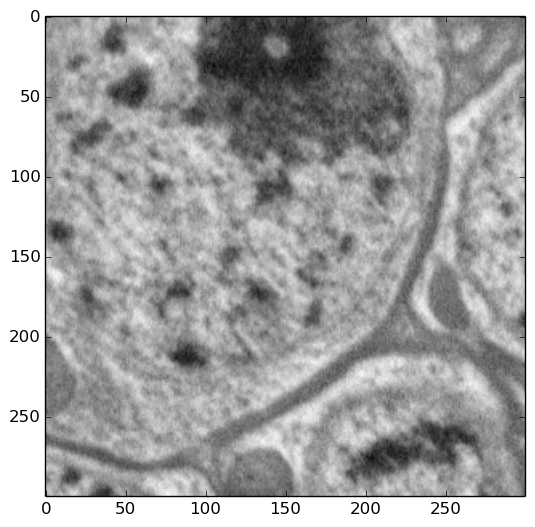

PyObject <matplotlib.image.AxesImage object at 0x7f75044f8ad0>

  likely near /usr/people/jingpeng/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /usr/people/jingpeng/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /usr/people/jingpeng/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /usr/people/jingpeng/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /usr/people/jingpeng/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /usr/people/jingpeng/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /usr/people/jingpeng/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /usr/people/jingpeng/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /usr/people/jingpeng/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /usr/people/jingpeng/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /usr/people/jingpeng/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /usr/people/jingpeng/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /usr/people/jingpeng/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /usr/people/jingpeng/.julia/v0.5/PyCall/src/PyCall.jl
  likely nea

In [17]:
resp = get("http://$(ip):8000/api/node/5c/grayscale/raw/0_1_2/300_300_2/2304_1472_1280")
@show length(resp.data)
arr = reshape(resp.data, (300,300,2))
Pkg.add("PyPlot")
using PyPlot
PyPlot.imshow(arr[:,:,2], cmap="gray")

In [3]:
function serialize_to_bytes(x)
    io = IOBuffer()
    serialize(io, x)
    takebuf_array(io)
end
deserialize_bytes(x) = deserialize(IOBuffer(x))

deserialize_bytes (generic function with 1 method)

In [4]:
resp = get("http://$(ip):8000/api/node/5c/grayscale/raw/0_1_2/300_300_2/2304_1472_1280")
@show length(resp.data)
arr = reshape(resp.data, (300,300,2))
using PyPlot
PyPlot.imshow(arr[:,:,2], cmap="gray")

using URIParser
uri = URIParser.URI("http://$(ip):8000/api/node/5c/grayscale/raw/0_1_2/300_300_2/2304_1472_1280")
resp = Requests.do_request(uri, "post"; data = serialize_to_bytes(arr))

length(resp.data) = 180000


LoadError: LoadError: ArgumentError: Module PyPlot not found in current path.
Run `Pkg.add("PyPlot")` to install the PyPlot package.
while loading In[4], in expression starting on line 4

In [91]:
hders = resp.headers

Dict{AbstractString,AbstractString} with 9 entries:
  "http_major"                  => "1"
  "Content-Length"              => "172"
  "X-Content-Type-Options"      => "nosniff"
  "Content-Type"                => "text/plain; charset=utf-8"
  "Date"                        => "Wed, 26 Oct 2016 18:11:57 GMT"
  "Access-Control-Allow-Origin" => "*"
  "http_minor"                  => "1"
  "Keep-Alive"                  => "1"
  "status_code"                 => "400"